# Video lesson \#14 notebook

## Part 1: `SciPy` linear regression

In [2]:
# Import two modules from SciPy package
from scipy import interpolate, stats

# Also import other useful libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [3]:
# Sample noisy data with a trend
x = np.arange(0,10,0.1)
y = 5*x - 25 + np.random.normal(0,25,size=100)

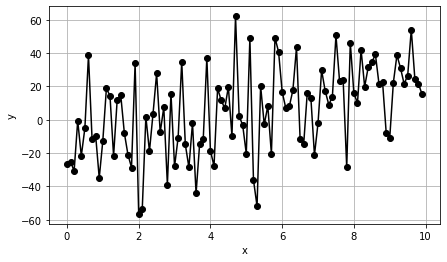

In [4]:
# Plot sample data
plt.figure(figsize=(7,4)) # dpi=300
plt.scatter(x,y,c='k',zorder=2)
plt.plot(x,y,c='k',zorder=3)
plt.grid(zorder=1)
plt.xlabel('x')
plt.ylabel('y');

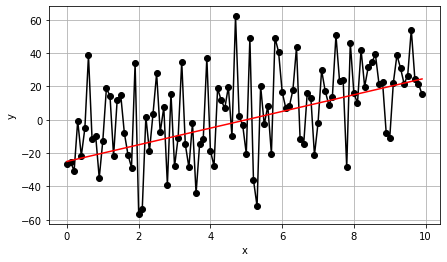

In [5]:
# Plot sample data with trend line
plt.figure(figsize=(7,4))
plt.scatter(x,y,c='k',zorder=2)
plt.plot(x,y,c='k',zorder=3)
plt.plot(x,5*x - 25,c='r',zorder=4)
plt.grid(zorder=1)
plt.xlabel('x')
plt.ylabel('y');

In [6]:
# Sample noisy data with a quadratic trend
x = np.arange(0,10,0.1)
y_quad = 4*(x-5)**2 + 5*x - 25 + np.random.normal(0,25,size=100)

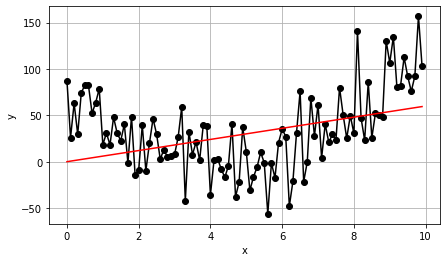

In [7]:
# Plot sample quadratic data with trend line
plt.figure(figsize=(7,4))
plt.scatter(x,y_quad,c='k',zorder=2)
plt.plot(x,y_quad,c='k',zorder=3)
plt.plot(x,6*x,c='r',zorder=4)
plt.grid(zorder=1)
plt.xlabel('x')
plt.ylabel('y');

In [8]:
# Sample noisy data with outliers and a trend
x = np.arange(0,10,0.1)
y_outlier = 25*x - 150 + np.random.normal(0,25,size=100)
y_outlier[-10:] -= 200

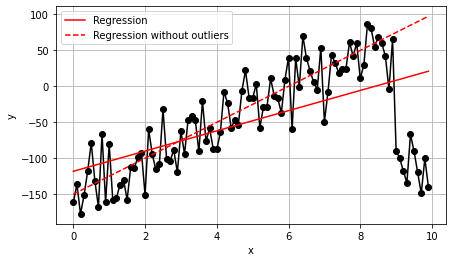

In [9]:
# Plot sample data with trend line
m, b = stats.linregress(x,y_outlier)[0:2]
plt.figure(figsize=(7,4))
plt.scatter(x,y_outlier,c='k',zorder=2)
plt.plot(x,y_outlier,c='k',zorder=3)
plt.plot(x,m*x + b,c='r',zorder=4,label='Regression')
plt.plot(x,25*x - 150,'r--',zorder=4,label='Regression without outliers')
plt.legend()
plt.grid(zorder=1)
plt.xlabel('x')
plt.ylabel('y');

In [10]:
# Linear regression on original noisy data
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x,y)

print('The slope is',round(slope,2))
print('The y-intercept is',round(intercept,2))
print('The r-value is',round(rvalue,2))
print('The p-value is',pvalue)
print('The standard error is',round(stderr,2))

The slope is 4.29
The y-intercept is -16.16
The r-value is 0.47
The p-value is 6.830058503530004e-07
The standard error is 0.81


In [11]:
# This is how you can make an array of Datetime objects useable in a regression
import matplotlib.dates as mdates

t = np.array([datetime(2020,1,1),datetime(2020,2,1),datetime(2020,3,1)])
t_as_numbers = mdates.date2num(t)

print(t_as_numbers)

[737425. 737456. 737485.]


## Part 2: `SciPy` 1-D interpolation (for 2-D examples, stay tuned for Class \#14 activities)

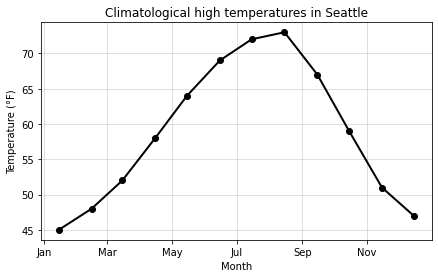

In [12]:
# Monthly climatological high temperatures for Seattle
mid_months = np.array([datetime(2020,mo,15) for mo in np.arange(1,13)])   # months 1 through 12
high_t = np.array([45,48,52,58,64,69,72,73,67,59,51,47])  # units: °F

# Plot original data
plt.figure(figsize=(7,4))
plt.plot(mid_months,high_t,c='k',lw=2,zorder=2)
plt.scatter(mid_months,high_t,c='k',zorder=3)
plt.ylabel('Temperature (°F)')
plt.xlabel('Month')
plt.title('Climatological high temperatures in Seattle');
plt.grid(alpha=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

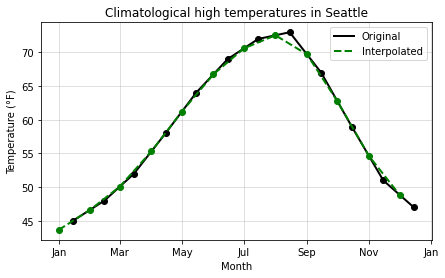

In [13]:
# Interpolation to 1st of each month
start_months = np.array([datetime(2020,mo,1) for mo in np.arange(1,13)])
interp_func = interpolate.interp1d(mdates.date2num(mid_months),high_t,
                                   fill_value='extrapolate',bounds_error=False)
high_t_interpolated = interp_func(mdates.date2num(start_months))

# Plot interpolated data
plt.figure(figsize=(7,4))
plt.plot(mid_months,high_t,c='k',lw=2,zorder=2,label='Original')
plt.scatter(mid_months,high_t,c='k',zorder=3)
plt.plot(start_months,high_t_interpolated,c='green',ls='--',lw=2,zorder=4,label='Interpolated')
plt.scatter(start_months,high_t_interpolated,c='green',zorder=5)
plt.ylabel('Temperature (°F)')
plt.xlabel('Month')
plt.title('Climatological high temperatures in Seattle')
plt.legend()
plt.grid(alpha=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))